# Trabajo semanal 10
## Síntesis de funciones de excitación disipativas


1) Encuentre el valor de los componentes del siguiente circuito
Sabiendo que está caracterizado por la siguiente función de excitación y constantes de tiempo:
<center>
$R1.C1=16$  
</center>
<center>
$R2.C2=27$  
</center>
<center>
$Z(s)=\frac{s2+6s+8}{s2+4s+3}$
</center>

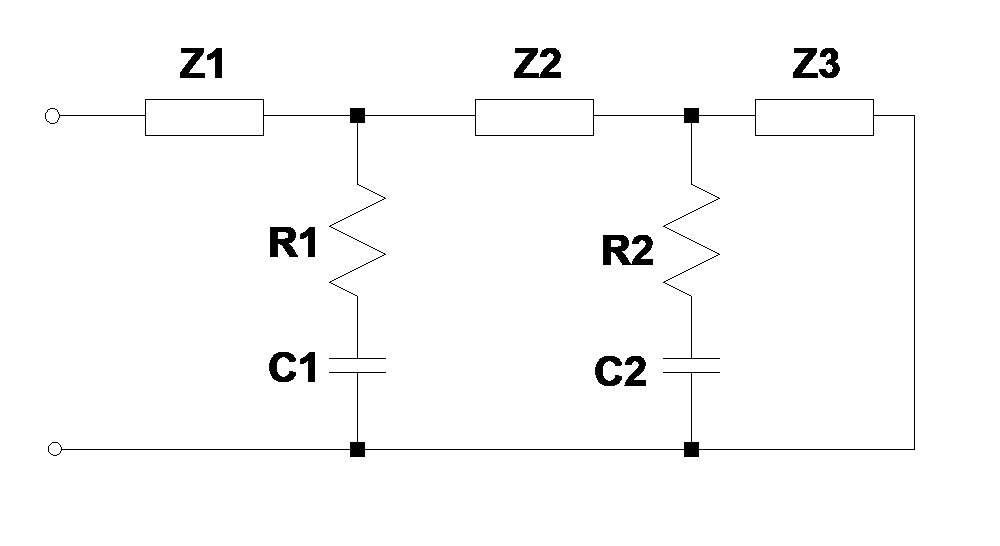

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 20 17:56:00 2023

@author: nico
"""
import sympy as sp
from sympy import collect, simplify
from pytc2.general import print_subtitle

s = sp.symbols('s',complex=True)
w1 = 6
w2 = 7/2

# Impedancia original
Z = (s**2+6*s+8)/(s**2+4*s+3)
print("Impedancia dada : {}".format(simplify(collect(Z,s)))) 

# Z1
Z1 = Z.subs(s,-w1)
print("Z1 : {}".format(simplify(collect(Z1,s)))) 

#### Quito Z1
Za = Z-Z1
print("Za: {}".format(simplify(collect(Za,s)))) 

#Matris inversa de Ya
Ya = 1/Za
print("Ya: {}".format(simplify(collect(Ya,s)))) 

#Obtengo la conductancia de resonador 1
Ya_eva = Ya*(s+w1)/s
Ya_eva = simplify(collect(Ya_eva,s))

print("Ya_eva: {}".format(simplify(collect(Ya_eva,s)))) 

# Evaluo en el polo del resonador para obtener su conductancia
R1 = 1/Ya_eva.subs(s, -w1) 

print("R1 : {}".format(simplify(collect(R1,s)))) 

# Capacitancia del primer rosonador
C1 = 1/w1/R1
print("C1 : {}".format(simplify(collect(C1,s)))) 

#Armo el tanque del primer razonador
Ycr1 = s/R1/(s+w1)

#### Quito al tanque 1 de la admintancia Ya
Yb = Ya-Ycr1
print("Yb : {}".format(simplify(collect(Yb,s)))) 

# Z2
Zb = 1/Yb
print("Zb : {}".format(simplify(collect(Zb,s)))) 
Z2 = Zb.subs(s,-w2)
print("Z2 : {}".format(simplify(collect(Z2,s)))) 

#### Quito Z2
Zc = (s*(52/15*7-Z2*17)+52/15*16-Z2*26)/(17*s+26) ## Lo puse de esta forma porque de otra forma me da cualquier cosa
print("Zc: {}".format(simplify(collect(Zc,s)))) 

#Obtengo la conductancia de resonador 1
Yc = 1/Zc
Yc_eva = Yc*(9.3134328358209*s + 32.5970149253731)/s*9.3134328358209 ## Lo puse asi porque se comieron muchas comas y es la unica forma de simplificar el polo en 7/2
Yc_eva  = simplify(collect(Yc_eva ,s))

print("Y2: {}".format(simplify(collect(Yc_eva,s)))) 

# Evaluo en el polo del resonador para obtener su conductancia
R2 = sp.limit(1/Yc_eva, s,-w2)
print("R2 : {}".format(simplify(collect(R2,s))))

# Capacitancia del primer rosonador
C2 = 1/w2/R2
print("C2 : {}".format(simplify(collect(C2,s)))) 

# Para calcular Z3 Utilizo el concepto que para w = 0 el circuito es puramente resisteivo
Zwo = sp.limit(Z,s,0)
print("Z(0) : {}".format(Zwo)) 

Z3 = Zwo-Z1-Z2
print("Z3 : {}".format(Z3)) 

Impedancia dada : (s**2 + 6*s + 8)/(s**2 + 4*s + 3)
Z1 : 8/15
Za: (7*s**2 + 58*s + 96)/(15*(s**2 + 4*s + 3))
Ya: 15*(s**2 + 4*s + 3)/(7*s**2 + 58*s + 96)
Ya_eva: 15*(s**2 + 4*s + 3)/(s*(7*s + 16))
R1 : 52/75
C1 : 0.240384615384615
Yb : 15*(17*s + 26)/(52*(7*s + 16))
Zb : 52*(7*s + 16)/(15*(17*s + 26))
Z2 : 0.879601990049751
Zc: (9.3134328358209*s + 32.5970149253731)/(17*s + 26)
Y2: (1474.5805301849*s**2 + 7416.27266651815*s + 7893.34283804856)/(s*(9.3134328358209*s + 32.5970149253731))
R2 : 0.00256347656250000
C2 : 111.455782312925
Z(0) : 8/3
Z3 : 1.25373134328358


## Valores resultantes de los componentes:
$Z1 = 8/15 \Omega$  
$Z2 = 0.88 \Omega$  
$Z3 = 1.25 \Omega$  
$R1 = 52/75 \Omega$  
$R2 = 0.0025 \Omega$  
$C1 = 0.24 F$  
$C2 = 111.45 F$  

# Ejercicio 2:

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 31 11:21:34 2023

@author: nico
"""

import sympy as sp
from sympy import collect, simplify
from pytc2.general import print_subtitle

s = sp.symbols('s',complex=True)

Z = (s**2+s+1)/((s**2+2*s+5)*(s+1))
Y = Z**-1

C1 = sp.limit(Y/s,s,sp.oo)
print("C1 : {}".format(C1)) 


Ya = simplify(collect(Y-s*C1,s))
#print(Ya)

G1 = sp.limit(Ya,s,sp.oo)
print("G1 : {}".format(G1)) 

Yb = simplify(collect(Ya-G1,s))
#print(Yb)
Zb = Yb**-1

L1 = sp.limit(Zb/s,s,sp.oo)
print("L1 : {}".format(L1)) 

Zc = simplify(collect(Zb-s*L1,s))
#print(Zc)

R2 = sp.limit(Zc,s,sp.oo)
R2R3 = sp.limit(Zc,s,0)
R3 = R2R3-R2
print("R2 : {}".format(R2)) 
print("R3 : {}".format(R3)) 

Zd = simplify(collect(Zc-R2,s))
#print(Zd)
Yd = Zd**-1

G3 = sp.limit(Yd,s,0)
print("G3 : {}".format(G3)) 

Cap = Yd-G3
#print(Cap)
C2 = Cap/s
print("C2 : {}".format(C2)) 

C1 : 1
G1 : 2
L1 : 1/4
R2 : 1/16
R3 : 13/48
G3 : 48/13
C2 : 64/13
